**Softmax regression**, also known as **multinomial logistic regression**, is a **generalization of logistic regression** that is used for **multi-class classification problems**—i.e., problems where the output variable can belong to **more than two classes**.

---

### 🧠 Core Idea

Softmax regression models the **probability distribution over $K$ possible classes** using the **softmax function**, which transforms raw scores (called logits) into probabilities that sum to 1.

For an input feature vector $\mathbf{x} \in \mathbb{R}^n$, and $K$ possible classes, softmax regression computes:

$$
P(y = k \mid \mathbf{x}) = \frac{\exp(\boldsymbol{\theta}_k^\top \mathbf{x})}{\sum_{j=1}^K \exp(\boldsymbol{\theta}_j^\top \mathbf{x})}
\quad \text{for } k = 1, \dots, K
$$

where:

* $\boldsymbol{\theta}_k \in \mathbb{R}^n$ is the weight vector for class $k$,
* $\boldsymbol{\theta}_k^\top \mathbf{x}$ is the score for class $k$,
* The denominator normalizes the scores to form a valid probability distribution.

---

### 📘 Example

If you're classifying handwritten digits (0 to 9), you have 10 classes. For each input image vector $\mathbf{x}$, the model will output a 10-dimensional vector of class probabilities using the softmax function.

---

### 📊 Training Objective

The model is trained to minimize the **cross-entropy loss** between the predicted probability distribution and the true label (one-hot encoded):

$$
\mathcal{L}(\boldsymbol{\Theta}) = -\sum_{i=1}^{m} \sum_{k=1}^K \mathbb{1}(y^{(i)} = k) \log P(y^{(i)} = k \mid \mathbf{x}^{(i)})
$$

where:

* $m$ is the number of training samples,
* $\boldsymbol{\Theta}$ denotes all class weight vectors.

---

### 🔍 Why "Softmax"?

The softmax function "softens" the decision boundaries by converting raw scores into a **probabilistic interpretation**, rather than making a hard decision like in argmax or 0/1 outputs.

---

### 🧮 When to Use It?

Use softmax regression when:

* You have **categorical output** with **more than two classes**.
* The classes are **mutually exclusive** (each sample belongs to one and only one class).
* You want **interpretable** class probabilities.

# Example

The plot below shows the decision boundaries of a **softmax regression** model trained on a synthetic dataset with **3 classes**. Here's a breakdown of what you're seeing:

* The background color regions indicate the areas where the model assigns the highest class probability (i.e., the predicted class).
* The points are the training samples, projected onto 2D via PCA.
* Colors of the points represent the true class labels.
* The model was trained using **multinomial logistic regression**, which uses the **softmax function** internally to classify inputs.

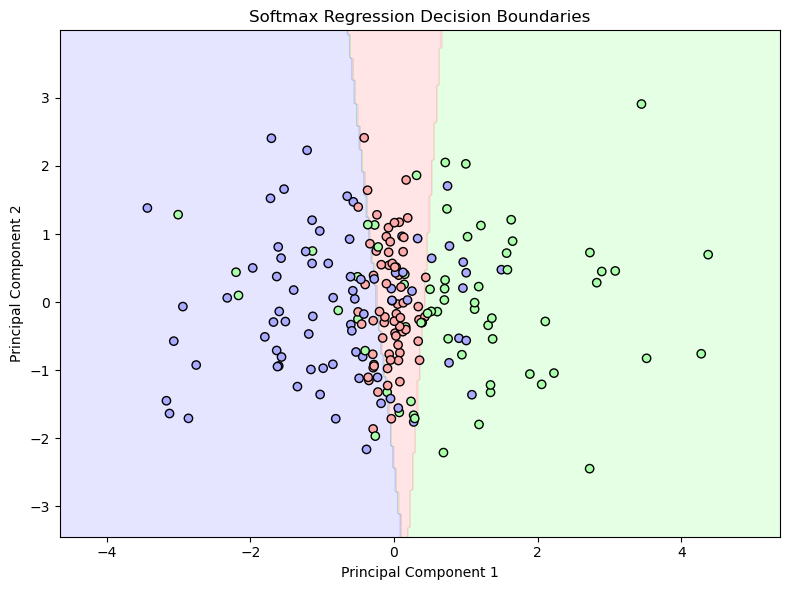

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# Create a synthetic dataset with 3 classes
X, y = make_classification(
    n_samples=300, n_features=4, n_informative=3, n_redundant=0,
    n_classes=3, n_clusters_per_class=1, random_state=42
)

# Standardize and reduce to 2D for visualization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.3, random_state=42)

# Train softmax regression (multinomial logistic regression)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Predict probabilities for visualization
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries and training points
fig, ax = plt.subplots(figsize=(8, 6))
cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap=cmap)
ax.set_title("Softmax Regression Decision Boundaries")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")

plt.tight_layout()
plt.show()


In the visualizations below, you will find:

1. **Class Probability Distributions**:
   The bar chart shows the predicted class probabilities for the **first 10 samples** in the test set. Each group of bars corresponds to a single sample, and each bar represents the model’s confidence in a specific class. This illustrates how the softmax function transforms scores into a probability distribution across classes.

2. **Confusion Matrix**:
   The confusion matrix summarizes the model’s performance on the **test set**. Each row corresponds to the **true class**, and each column corresponds to the **predicted class**. Diagonal elements indicate correct predictions.

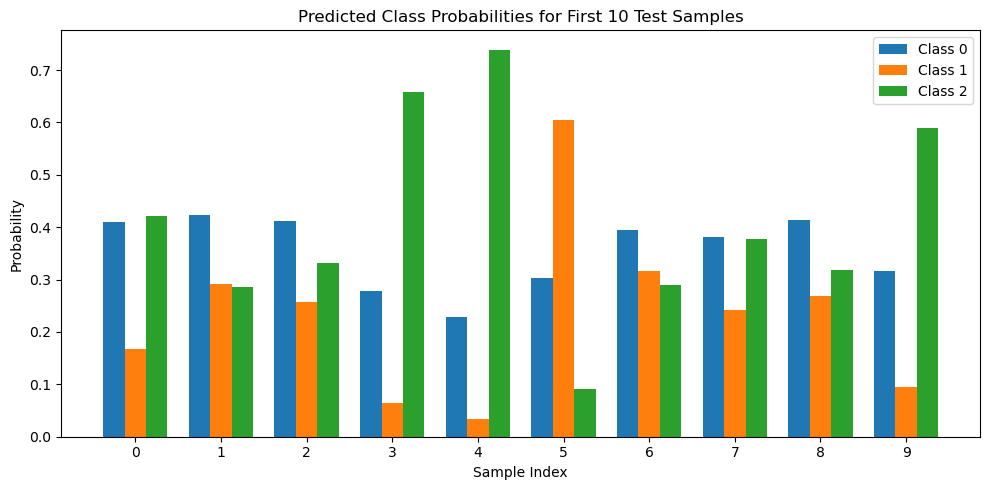

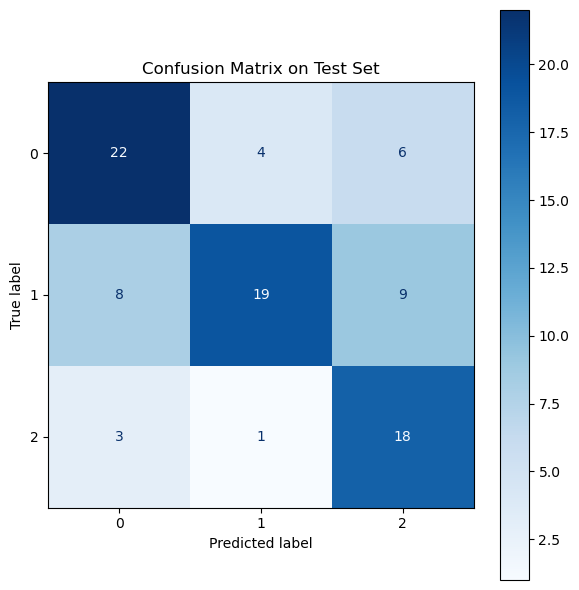

In [3]:
# Predict class probabilities on the test set
probs = model.predict_proba(X_test)

# Visualize class probabilities for the first 10 test samples
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(10)
bar_width = 0.25

for i in range(probs.shape[1]):
    ax.bar(x + i * bar_width, probs[:10, i], bar_width, label=f'Class {i}')

ax.set_title('Predicted Class Probabilities for First 10 Test Samples')
ax.set_xlabel('Sample Index')
ax.set_ylabel('Probability')
ax.set_xticks(x + bar_width)
ax.set_xticklabels([f'{i}' for i in range(10)])
ax.legend()
plt.tight_layout()
plt.show()

# Display confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax, cmap='Blues')
ax.set_title("Confusion Matrix on Test Set")
plt.tight_layout()
plt.show()
